# pset 1 q4

Fetch coordinates for a list of objects from a name resolver and plot ra vs dec. 
Also plot galactic equator, NGP, SGP and galactic center.

In [1]:
from astropy.coordinates import SkyCoord, Galactic, ICRS
import astropy.units as u
from astroquery.simbad import Simbad

# create a name resolver
simbad = Simbad()

names = [ "Sirius", "Alpha Cen", "Achernar", "Polaris", "Alnitak", "Alnilam", "Mintaka",
    "M 31", "LMC", "SMC", "Cyg A", "Sgr A*", "Cen A", "Sco X-1", "Cyg X-1", "NGC 4594", "Abell 1656"]

table = simbad.query_objects(names)

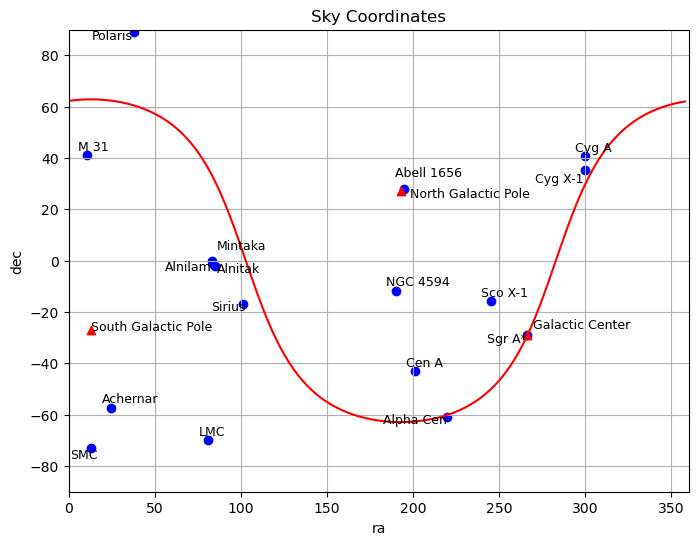

In [4]:
import matplotlib.pyplot as plt
from adjustText import adjust_text


ras = table['ra']
decs = table['dec']
coords = SkyCoord(ras, decs, unit="deg")

#create plot
plt.figure(figsize=(8, 6))
plt.scatter(coords.ra, coords.dec, c='blue', marker='o')

#add labels, collecting them in an array to allow layout adjustment later
texts = []
for (name,coord) in zip(names, coords):
    texts.append(plt.text(coord.ra.deg, coord.dec.deg, name, fontsize=9, ha='right'))

#plot galactic equator
gal_ls = range(0,360)
gal_bs = [0 for l in gal_ls]
eq_coords = SkyCoord(frame=Galactic, l=gal_ls, b=gal_bs, unit="deg")
eq_coords = eq_coords.transform_to(ICRS)

#sort the coordinates by RA so the graph renders correctly
eq_coords = SkyCoord(sorted(eq_coords, key=lambda coord: coord.ra))
plt.plot(eq_coords.ra.deg, eq_coords.dec.deg, c='red')

#plot galactic center, north and south poles
# !!! actually these are not the galactic north/south poles in 
gal_specials = [(0,0,"Galactic Center"), (0,90, "North Galactic Pole"), (0,-90, "South Galactic Pole")]
for (l,b,label) in gal_specials:
    coord = SkyCoord(frame=Galactic, l=l, b=b, unit="deg").transform_to(ICRS)
    plt.scatter(coord.ra.deg, coord.dec.deg, c='red', marker='^')
    texts.append(plt.text(coord.ra.deg, coord.dec.deg, label, fontsize=9, ha='left'))
    
#legend
plt.xlabel("ra")
plt.ylabel("dec")
plt.xlim(0,359.99)
plt.ylim(-90,90)
plt.title("Sky Coordinates")
plt.grid(True)

# adjust text labels to avoid overlap
adjust_text(texts)

#display
plt.show()